# Linear Regression1

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('headbrain.csv')

In [8]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [14]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [15]:
df.shape

(237, 4)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [19]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [26]:
df.rename(columns={'Head Size(cm^3)':'HeadSize'}, inplace=True)

In [29]:
df.rename(columns={'Brain Weight(grams)':'BrainWeight'}, inplace=True)

In [30]:
df.rename(columns={'Age Range':'AgeRange'}, inplace=True)

In [31]:
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

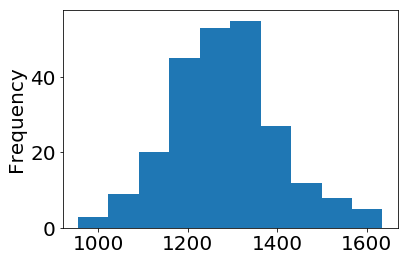

In [57]:
df.BrainWeight.plot('hist')
plt.show()

In [58]:
Men=df[df.Gender==1]
Women=df[df.Gender==2]

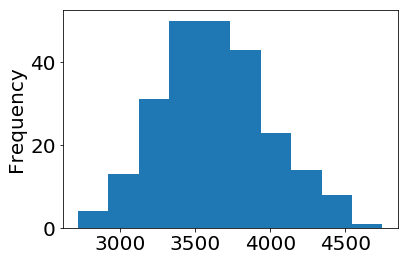

In [59]:
df.HeadSize.plot('hist')

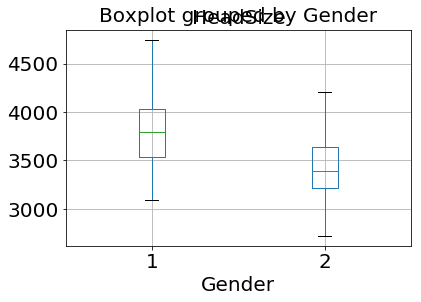

In [60]:
df.boxplot(column='HeadSize', by='Gender')

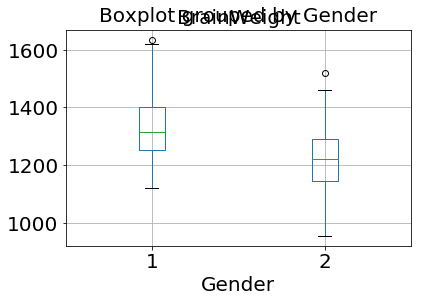

In [61]:
df.boxplot(column='BrainWeight', by='Gender')

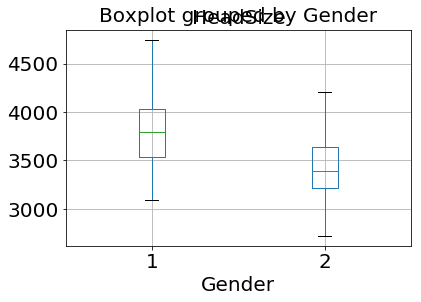

In [55]:
df.boxplot(column='HeadSize', by='Gender')

# For box plot we will import seborn

In [68]:
import seaborn as sns

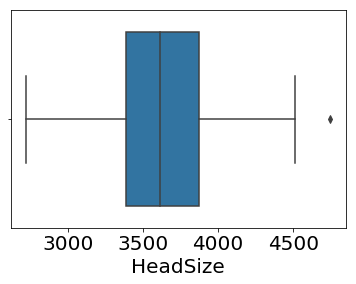

In [77]:
ax=sns.boxplot(x=df['HeadSize'])

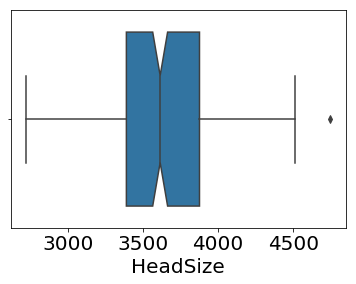

In [78]:
ax=sns.boxplot(x=df['HeadSize'], notch=True)

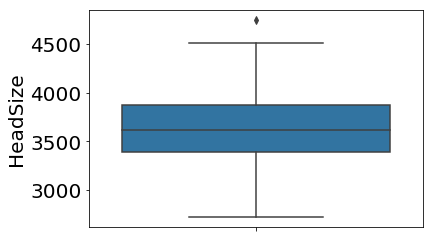

In [75]:
ax=sns.boxplot(y=df['HeadSize'])

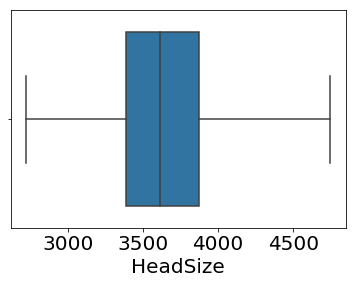

In [81]:
ax=sns.boxplot(x=df['HeadSize'], whis=2)

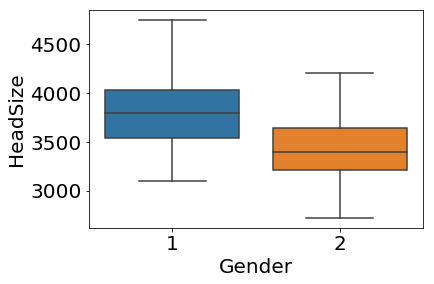

In [88]:
ax=sns.boxplot(x=df['Gender'], y=df['HeadSize'], whis=2)

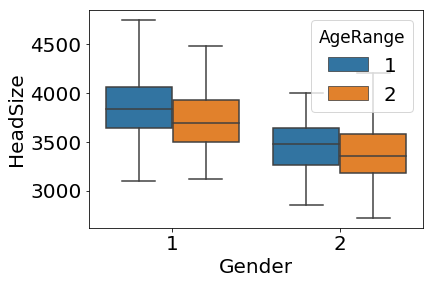

In [89]:
ax=sns.boxplot(x=df['Gender'], y=df['HeadSize'], hue=df['AgeRange'], whis=2)

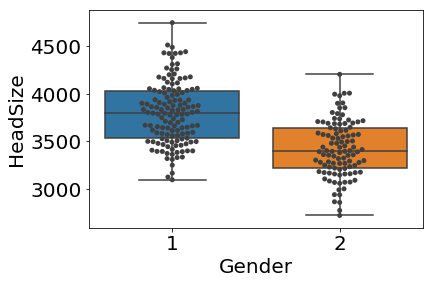

In [91]:
ax=sns.boxplot(x=df['Gender'], y=df['HeadSize'], whis=2)
ax=sns.swarmplot(x=df['Gender'], y=df['HeadSize'], color='0.25')

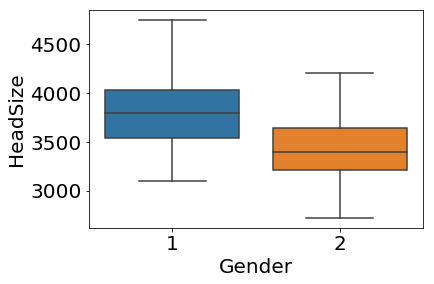

In [110]:
ax=sns.boxplot(x=df['Gender'], y=df['HeadSize'], whis=2)

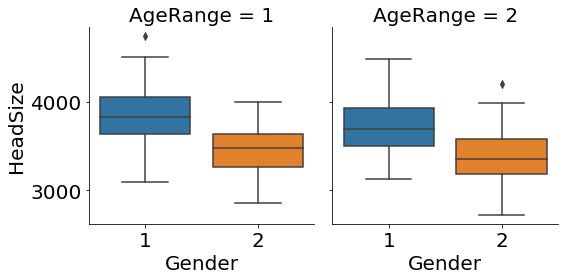

In [106]:
sns.factorplot(data=df, x='Gender', y='HeadSize', 
               col='AgeRange', 
               kind='box', legend=True)

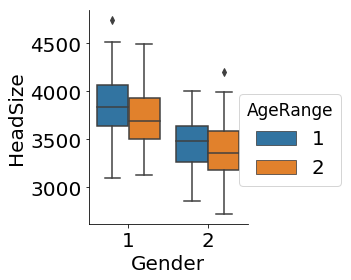

In [112]:
sns.factorplot(data=df, x='Gender', y='HeadSize', 
               hue='AgeRange', 
               kind='box', legend=True)

In [115]:
df_corr = df.corr()
df_corr

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


In [116]:
df_corr.style.background_gradient()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1,-0.0886521,-0.51405,-0.465266
AgeRange,-0.0886521,1,-0.105428,-0.169438
HeadSize,-0.51405,-0.105428,1,0.79957
BrainWeight,-0.465266,-0.169438,0.79957,1


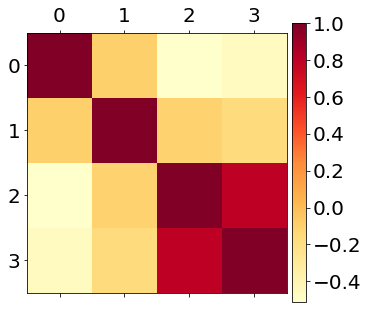

In [117]:
plt.figure(figsize=(5, 5))
plt.matshow(df_corr,
            cmap = plt.cm.get_cmap('YlOrRd'),    # Sequential
#            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fignum=1)
plt.colorbar(fraction=0.05, pad=0.02)
plt.show()

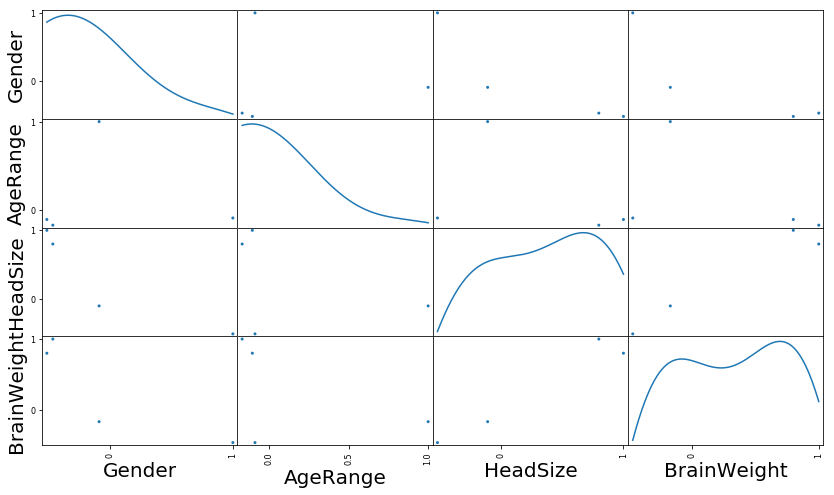

In [118]:
pd.plotting.scatter_matrix(df_corr, alpha = 1.0, figsize = (14,8), diagonal = 'kde')
# Why did I add the empty print statement below?
print("")

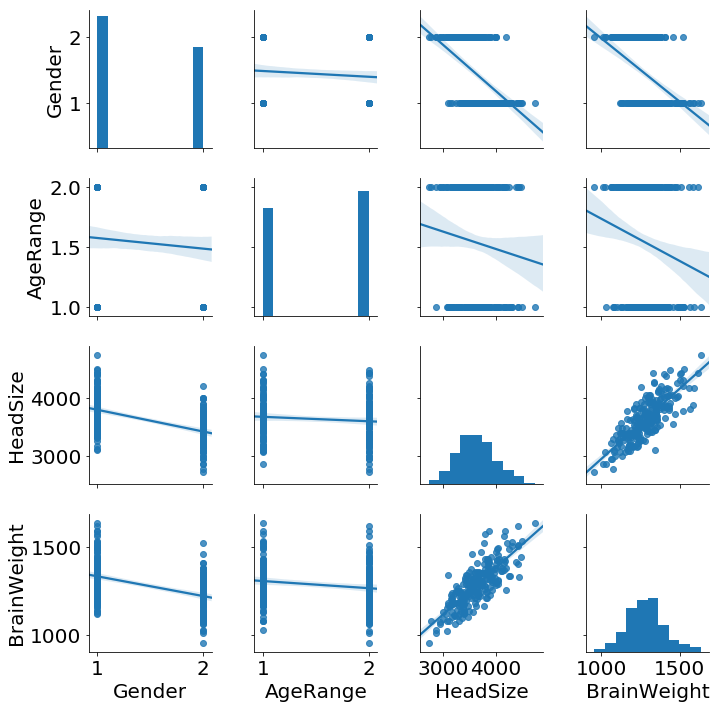

In [119]:
sns.pairplot(df, kind="reg")

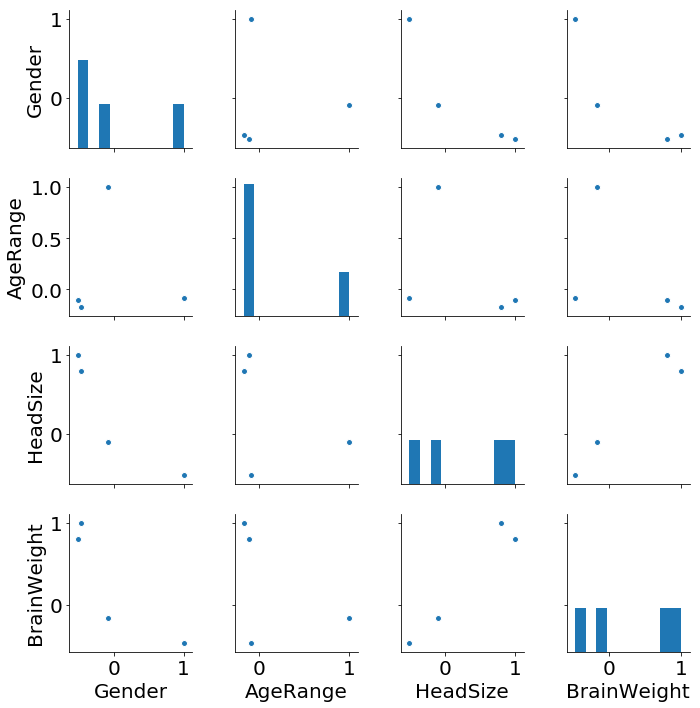

In [120]:
sns.pairplot(df_corr)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotli

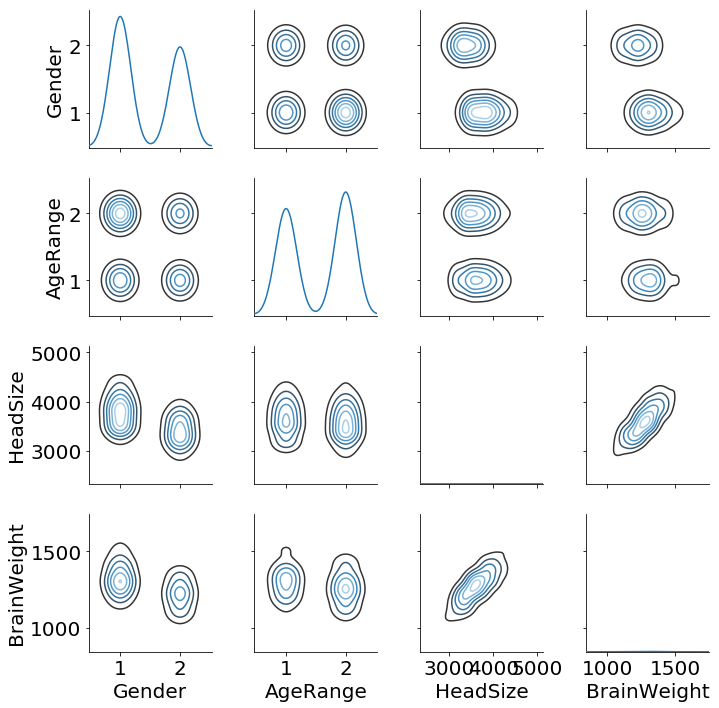

In [121]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [123]:
df.to_csv("Linear_Regression1.csv", sep=',', index=False, header=True)

Let's split the data into training and test sets:

In [157]:
bw=df['BrainWeight']
bw.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [161]:
hs=df['HeadSize']
hs.head()

0    4512
1    3738
2    4261
3    3777
4    4177
Name: HeadSize, dtype: int64

In [158]:
size=len(df)

In [162]:
train_size = int(0.7*size)
hs_train = hs[:train_size]
hs_test = hs[train_size:]
bw_train = bw[:train_size]
bw_test = bw[train_size:]
print(hs_train.shape)
print(hs_test.shape)
print(bw_train.shape)
print(bw_test.shape)

(165,)
(72,)
(165,)
(72,)


# ............

# Linear Regression using seaborn

All the following plots capture the regression relationship between some or all of the inputs and the output:

In [130]:
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


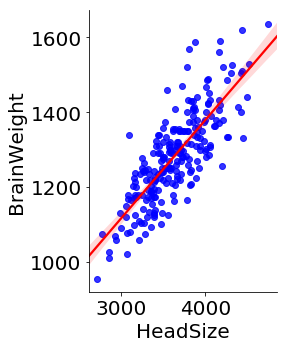

In [131]:
sns.pairplot(df, x_vars=["HeadSize"], y_vars=["BrainWeight"],
             size=5, aspect=.8, kind="reg", palette="muted",
             plot_kws={'color':'blue', 'line_kws':{'color':'red'}})

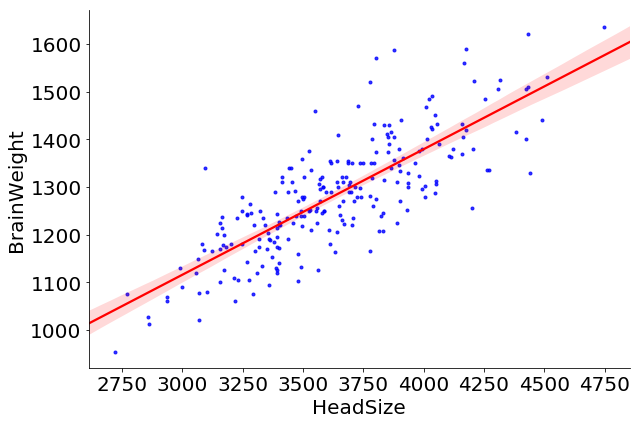

In [132]:
sns.lmplot('HeadSize', 'BrainWeight', data=df, markers=".", size=6, aspect=1.5,
            scatter_kws={'color':'blue'}, line_kws={'color': 'red'})

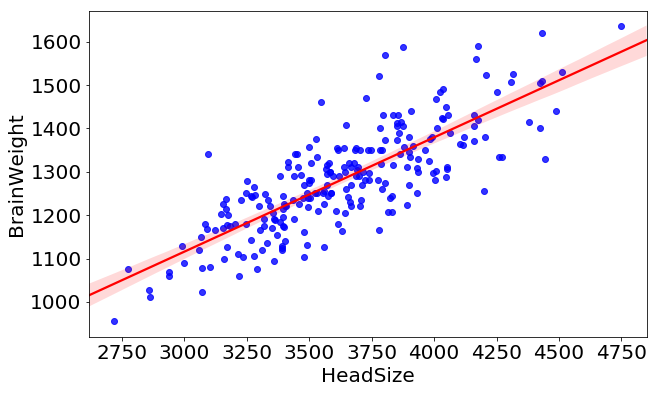

In [134]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.regplot(x="HeadSize", y="BrainWeight", data=df, ax=ax,
            scatter_kws={'color':'blue'}, line_kws={'color': 'red'})

C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\AKAYA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


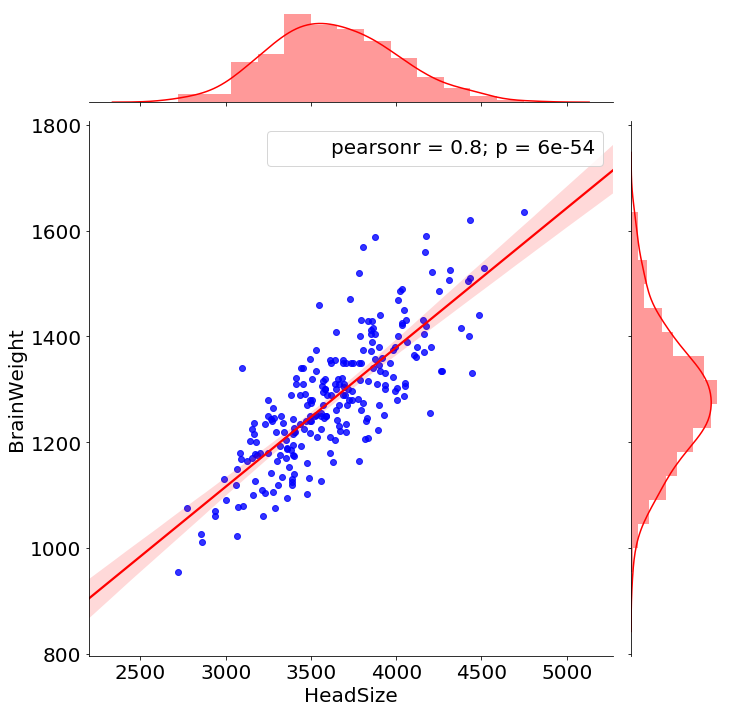

In [135]:
sns.jointplot(x="HeadSize", y="BrainWeight", data=df, kind='reg', color='red', size=10,
             scatter_kws={'color':'blue'}, line_kws={'color': 'red'})

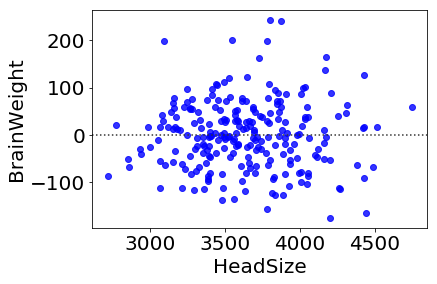

In [136]:
sns.residplot(x="HeadSize", y="BrainWeight", data=df, color='red',
             scatter_kws={'color':'blue'}, line_kws={'color': 'red'})

# Linear Regression using statsmodels

In [137]:
import statsmodels.api as sm

In [163]:
# add an intercept (beta_0) to the model, otherwise the model is forced to go through origin!
hs_train_with_const = sm.add_constant(hs_train) 

linear_regression_1 = sm.OLS(bw_train, hs_train_with_const).fit()

# do the same conversion to X_test
hs_test_with_const = sm.add_constant(hs_test) 

bw_test_pred_1 = linear_regression_1.predict(hs_test_with_const) # make the predictions by the model

# Print out the statistics
linear_regression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BrainWeight   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     206.0
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           9.91e-31
Time:                        00:00:03   Log-Likelihood:                -948.04
No. Observations:                 165   AIC:                             1900.
Df Residuals:                     163   BIC:                             1906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        400.7524     64.004      6.261      0.000     274.368     527.137
HeadSize       0.2452      0.017     14.354      0.000       0.211       0.279
==============================================================================
Omnibus:                        6.868   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.592
Skew:                           0.420   Prob(JB):                       0.0370
Kurtosis:                       3.505   Cond. No.                     4.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
linear_regression_1.params

const       400.752419
HeadSize      0.245164
dtype: float64

# Linear Regression using sklearn

In [167]:
from sklearn import linear_model

In [180]:
from sklearn import datasets

In [181]:
linear_regression_2 = linear_model.LinearRegression().fit(hs_train,bw_train)

bw_test_pred_2 = linear_regression_2.predict(hs_test) # make the predictions by the model



ValueError: Expected 2D array, got 1D array instead:
array=[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3804 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458
 3890 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381
 4008 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577
 3933 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490
 3654 3478 3495 3834 3876 3661 3618 3648 4032 3399 3916 4430 3695 3524
 3571 3594 3383 3499 3589 3900 4114 3937 3399 4200 4488 3614 4051 3782
 3391 3124 4053 3582 3666 3532 4046 3667 2857 3436 3791 3302 3104 3171
 3572 3530 3175 3438 3903 3899 3401 3267 3451 3090 3413 3323 3680 3439
 3853 3156 3279 3707 4006 3269 3071 3779 3548 3292 3497].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [170]:
linear_regression_2.intercept_

2.0463630789890885e-12

In [173]:
linear_regression_2.score(df_train,bw_train)

1.0

# Linear Regression using PyTorch


We will use the linear model from the NN (Neural Network) package. We will try two methods. The first will use Stochastic Gradient Descent and iterate a given number of epochs. And the second one will use Batch Gradient Descent and will stop after the loss drops below a given limit. We will see which one will converge faster.


Let's first define the linear regression model that we will use in both methods.

In [175]:
import torch

In [176]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [179]:
input_dim = 1
output_dim = 1
class LinearRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressor, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, hs):
        out = self.linear(hs)
        return out

linear_regression_3 = LinearRegressor(input_dim, output_dim)